### De Leo et al. scaling model in Julia

*Author*: Christopher Davis

*Date*: 2018-10-02

In [1]:
using DifferentialEquations

In [2]:
micro_1 = @ode_def Micro1 begin
    dS = r*(1-S/K)*S - β*S*I
    dI = β*S*I-(μ+α)*I
    end β r μ K α

(::Micro1) (generic function with 4 methods)

In [3]:
w = 1;
m = 10;
β = 0.0247*m*w^0.44;
r = 0.6*w^-0.27;
μ = 0.4*w^-0.26;
K = 16.2*w^-0.7;
α = (m-1)*μ;

In [4]:
parms = [β,r,μ,K,α];
init = [K,1.];
tspan = (0.0,10.0);

In [5]:
sir_prob = ODEProblem(micro_1,init,tspan,parms)

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [16.2, 1.0]

In [6]:
sir_sol = solve(sir_prob);

#### Visualisation

In [7]:
using Plots

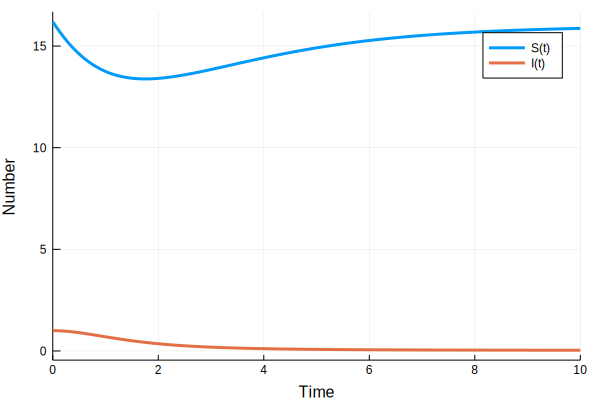

In [8]:
plot(sir_sol,xlabel="Time",ylabel="Number")

#### Threshold criterion for transmission rate

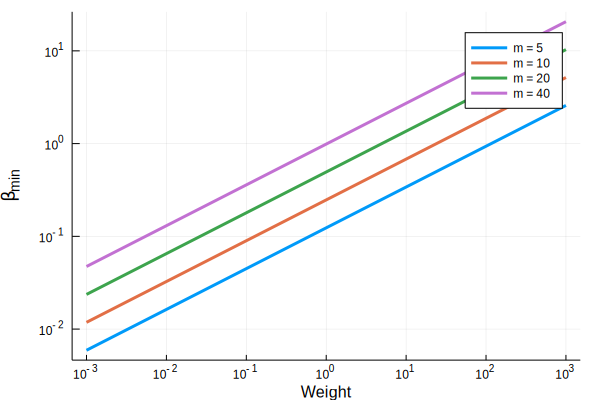

In [9]:
m = [5,10,20,40]
ws = 10.^linspace(-3,3,601)
βs = zeros(601,4)
for i = 1:4
    βs[:,i] = 0.0247*m[i]*ws.^0.44
end
plot(ws,βs,xlabel="Weight",ylabel="\\beta_min", xscale=:log10,yscale=:log10, label=["m = 5" "m = 10" "m = 20" "m = 40"],lw=3)